# Chapter 3: Managing and preparing data



In [46]:
# Import required libraries
# For analysis:
import numpy as np
import pandas as pd  # might require 'pip install openpyxl' to read Excel files
# For plotting:
import matplotlib.pyplot as plt
import seaborn as sns

In [47]:
# Load Data
hflights = pd.read_csv('../data/hflights.csv', index_col=0)

### Preview data

In [48]:
hflights.info()
hflights.iloc[0:5, 0:8]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 227496 entries, 5424 to 6083259
Data columns (total 21 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Year               227496 non-null  int64  
 1   Month              227496 non-null  int64  
 2   DayofMonth         227496 non-null  int64  
 3   DayOfWeek          227496 non-null  int64  
 4   DepTime            224591 non-null  float64
 5   ArrTime            224430 non-null  float64
 6   UniqueCarrier      227496 non-null  object 
 7   FlightNum          227496 non-null  int64  
 8   TailNum            226701 non-null  object 
 9   ActualElapsedTime  223874 non-null  float64
 10  AirTime            223874 non-null  float64
 11  ArrDelay           223874 non-null  float64
 12  DepDelay           224591 non-null  float64
 13  Origin             227496 non-null  object 
 14  Dest               227496 non-null  object 
 15  Distance           227496 non-null  int64  
 16

,Year,Month,DayofMonth,DayOfWeek,DepTime,ArrTime,UniqueCarrier,FlightNum
5424,2011,1,1,6,1400.0,1500.0,AA,428
5425,2011,1,2,7,1401.0,1501.0,AA,428
5426,2011,1,3,1,1352.0,1502.0,AA,428
5427,2011,1,4,2,1403.0,1513.0,AA,428
5428,2011,1,5,3,1405.0,1507.0,AA,428


### Select data

In [49]:
d1 = hflights.loc[:, ['ArrTime', 'DepTime']]  # alternative: hflights[['ArrTime', 'DepTime']]
d1.head()

,ArrTime,DepTime
5424,1500.0,1400.0
5425,1501.0,1401.0
5426,1502.0,1352.0
5427,1513.0,1403.0
5428,1507.0,1405.0


In [50]:
# Helper Functions
d2 = hflights.filter(regex='Time')
d2.head()

,DepTime,ArrTime,ActualElapsedTime,AirTime
5424,1400.0,1500.0,60.0,40.0
5425,1401.0,1501.0,60.0,45.0
5426,1352.0,1502.0,70.0,48.0
5427,1403.0,1513.0,70.0,39.0
5428,1405.0,1507.0,62.0,44.0


In [51]:
d3 = hflights.filter(regex='Time|Delay')
d3.head()

,DepTime,ArrTime,ActualElapsedTime,AirTime,ArrDelay,DepDelay
5424,1400.0,1500.0,60.0,40.0,-10.0,0.0
5425,1401.0,1501.0,60.0,45.0,-9.0,1.0
5426,1352.0,1502.0,70.0,48.0,-8.0,-8.0
5427,1403.0,1513.0,70.0,39.0,3.0,3.0
5428,1405.0,1507.0,62.0,44.0,-3.0,5.0


In [52]:
d4 = hflights.select_dtypes(include=np.number)
d4.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,ArrTime,FlightNum,ActualElapsedTime,AirTime,ArrDelay,DepDelay,Distance,TaxiIn,TaxiOut,Cancelled,Diverted
5424,2011,1,1,6,1400.0,1500.0,428,60.0,40.0,-10.0,0.0,224,7.0,13.0,0,0
5425,2011,1,2,7,1401.0,1501.0,428,60.0,45.0,-9.0,1.0,224,6.0,9.0,0,0
5426,2011,1,3,1,1352.0,1502.0,428,70.0,48.0,-8.0,-8.0,224,5.0,17.0,0,0
5427,2011,1,4,2,1403.0,1513.0,428,70.0,39.0,3.0,3.0,224,9.0,22.0,0,0
5428,2011,1,5,3,1405.0,1507.0,428,62.0,44.0,-3.0,5.0,224,9.0,9.0,0,0


In [53]:
d5 = hflights.select_dtypes(include='object')
d5.head()

,UniqueCarrier,TailNum,Origin,Dest,CancellationCode
5424,AA,N576AA,IAH,DFW,NaN
5425,AA,N557AA,IAH,DFW,NaN
5426,AA,N541AA,IAH,DFW,NaN
5427,AA,N403AA,IAH,DFW,NaN
5428,AA,N492AA,IAH,DFW,NaN


### Filter Function

In [54]:
d6 = hflights.loc[hflights['Distance'] > 1000, :]
d6.shape

(65389, 21)

In [55]:
d7 = hflights.loc[(hflights['CancellationCode'] == 'D') | (hflights['CancellationCode'] == 'B'), :]
d7.shape

(1653, 21)

In [56]:
d8 = hflights.loc[hflights['CancellationCode'].isin(['B', 'D']), :]
d8.shape

(1653, 21)

In [57]:
hflights['TotalDelay'] = hflights['ArrDelay'] + hflights['DepDelay']
d9 = hflights.loc[hflights['TotalDelay'] > 60, :]
d9.shape
d9.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,ArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,...,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,TotalDelay
5432,2011,1,9,7,1443.0,1554.0,AA,428,N476AA,71.0,...,43.0,IAH,DFW,224,8.0,22.0,0,NaN,0,87.0
5433,2011,1,10,1,1443.0,1553.0,AA,428,N504AA,70.0,...,43.0,IAH,DFW,224,6.0,19.0,0,NaN,0,86.0
5440,2011,1,17,1,1530.0,1634.0,AA,428,N518AA,64.0,...,90.0,IAH,DFW,224,8.0,8.0,0,NaN,0,174.0
5443,2011,1,20,4,1507.0,1622.0,AA,428,N425AA,75.0,...,67.0,IAH,DFW,224,9.0,24.0,0,NaN,0,139.0
5454,2011,1,31,1,1441.0,1553.0,AA,428,N505AA,72.0,...,41.0,IAH,DFW,224,8.0,25.0,0,NaN,0,84.0


In [58]:
d10 = hflights.loc[hflights['AirTime'] < hflights['TotalDelay'], :]
d10.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,ArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,...,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,TotalDelay
5432,2011,1,9,7,1443.0,1554.0,AA,428,N476AA,71.0,...,43.0,IAH,DFW,224,8.0,22.0,0,NaN,0,87.0
5433,2011,1,10,1,1443.0,1553.0,AA,428,N504AA,70.0,...,43.0,IAH,DFW,224,6.0,19.0,0,NaN,0,86.0
5434,2011,1,11,2,1429.0,1539.0,AA,428,N565AA,70.0,...,29.0,IAH,DFW,224,8.0,20.0,0,NaN,0,58.0
5440,2011,1,17,1,1530.0,1634.0,AA,428,N518AA,64.0,...,90.0,IAH,DFW,224,8.0,8.0,0,NaN,0,174.0
5443,2011,1,20,4,1507.0,1622.0,AA,428,N425AA,75.0,...,67.0,IAH,DFW,224,9.0,24.0,0,NaN,0,139.0


In [59]:
d9 = hflights.loc[(hflights['ArrDelay'] + hflights['DepDelay']) > 60, :]
d10 = hflights.loc[hflights['AirTime'] < (hflights['ArrDelay'] + hflights['DepDelay']), :]

d11 = hflights.loc[hflights['AirTime'] < (hflights['ArrDelay'] + hflights['DepDelay']), :]
d12 = d11.loc[:, ['FlightNum', 'DayOfWeek', 'AirTime', 'ArrDelay', 'DepDelay']]
d12.head()

,FlightNum,DayOfWeek,AirTime,ArrDelay,DepDelay
5432,428,7,41.0,44.0,43.0
5433,428,1,45.0,43.0,43.0
5434,428,2,42.0,29.0,29.0
5440,428,1,48.0,84.0,90.0
5443,428,4,42.0,72.0,67.0


### Piping

In [60]:
x = np.array([25, 2, 72, 456, 8, 34, 6, 7, 2, 3, 4])
np.round(np.exp(np.sqrt(np.log(x))), 1)

array([ 6. ,  2.3,  7.9, 11.9,  4.2,  6.5,  3.8,  4. ,  2.3,  2.9,  3.2])

In [61]:
# Rename Function
d13 = hflights.rename(columns={'DepartureTime': 'DepTime', 'ArrivalTime': 'ArrTime'})
d13.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,ArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,...,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,TotalDelay
5424,2011,1,1,6,1400.0,1500.0,AA,428,N576AA,60.0,...,0.0,IAH,DFW,224,7.0,13.0,0,NaN,0,-10.0
5425,2011,1,2,7,1401.0,1501.0,AA,428,N557AA,60.0,...,1.0,IAH,DFW,224,6.0,9.0,0,NaN,0,-8.0
5426,2011,1,3,1,1352.0,1502.0,AA,428,N541AA,70.0,...,-8.0,IAH,DFW,224,5.0,17.0,0,NaN,0,-16.0
5427,2011,1,4,2,1403.0,1513.0,AA,428,N403AA,70.0,...,3.0,IAH,DFW,224,9.0,22.0,0,NaN,0,6.0
5428,2011,1,5,3,1405.0,1507.0,AA,428,N492AA,62.0,...,5.0,IAH,DFW,224,9.0,9.0,0,NaN,0,2.0


In [62]:
# Mutate Function
d15 = hflights.copy()
d15['ActualGroundTime'] = d15['ActualElapsedTime'] - d15['AirTime']
d15['TaxiTime'] = d15['TaxiIn'] + d15['TaxiOut']
d15['AvgSpeed'] = 60 * (d15['Distance'] / d15['AirTime'])
d15.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,ArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,...,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,TotalDelay,ActualGroundTime,TaxiTime,AvgSpeed
5424,2011,1,1,6,1400.0,1500.0,AA,428,N576AA,60.0,...,224,7.0,13.0,0,NaN,0,-10.0,20.0,20.0,336.000000
5425,2011,1,2,7,1401.0,1501.0,AA,428,N557AA,60.0,...,224,6.0,9.0,0,NaN,0,-8.0,15.0,15.0,298.666667
5426,2011,1,3,1,1352.0,1502.0,AA,428,N541AA,70.0,...,224,5.0,17.0,0,NaN,0,-16.0,22.0,22.0,280.000000
5427,2011,1,4,2,1403.0,1513.0,AA,428,N403AA,70.0,...,224,9.0,22.0,0,NaN,0,6.0,31.0,31.0,344.615385
5428,2011,1,5,3,1405.0,1507.0,AA,428,N492AA,62.0,...,224,9.0,9.0,0,NaN,0,2.0,18.0,18.0,305.454545


In [63]:
# Arrange Function
d17 = hflights.sort_values(by='AirTime')
d17.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,ArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,...,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,TotalDelay
4066356,2011,8,31,3,1255.0,1346.0,CO,1646,N11612,51.0,...,0.0,IAH,AUS,140,8.0,32.0,0,NaN,0,-7.0
2599099,2011,6,5,7,1145.0,1225.0,CO,405,N32626,40.0,...,0.0,IAH,SAT,191,6.0,15.0,0,NaN,0,-16.0
683596,2011,2,23,3,947.0,1030.0,XE,2204,N17928,43.0,...,32.0,IAH,BPT,79,5.0,16.0,0,NaN,0,61.0
1688984,2011,4,8,5,2017.0,2057.0,XE,2418,N14925,40.0,...,17.0,IAH,LCH,127,6.0,12.0,0,NaN,0,24.0
4334034,2011,9,20,2,728.0,833.0,XE,2507,N15572,65.0,...,-2.0,IAH,AUS,140,5.0,37.0,0,NaN,0,1.0


In [64]:
# Summarize Function
s1 = hflights.groupby('UniqueCarrier').agg({'AirTime': 'mean'})
s1

,AirTime
UniqueCarrier,
AA,69.652612
AS,254.184066
B6,183.985141
CO,145.457873
DL,97.801235
EV,103.656766
F9,125.341346
FL,92.706300
MQ,93.839476


In [65]:
s3 = hflights.groupby(['UniqueCarrier', 'Origin']).agg({'AirTime': ['mean', 'count', 'max']})
s3.columns = ['AvgTime', 'NumFlights', 'LongestFlightTime']
s3.reset_index(inplace=True)
s3

,UniqueCarrier,Origin,AvgTime,NumFlights,LongestFlightTime
0,AA,IAH,69.652612,3178,161.0
1,AS,IAH,254.184066,364,315.0
2,B6,HOU,183.985141,673,258.0
3,CO,IAH,145.457873,69373,549.0
4,DL,HOU,92.389785,372,135.0
5,DL,IAH,98.708427,2219,188.0
6,EV,HOU,92.879545,440,117.0
7,EV,IAH,106.477692,1681,173.0
8,F9,HOU,125.341346,832,190.0
9,FL,HOU,92.706300,2111,186.0


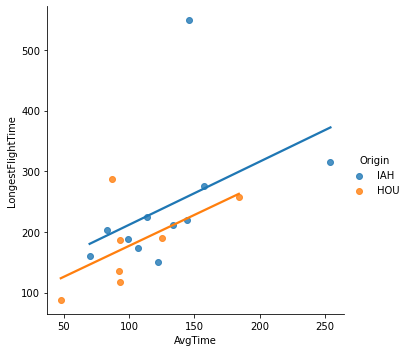

In [66]:
# Plot
sns.lmplot(x='AvgTime', y='LongestFlightTime', hue='Origin', data=s3, ci=None)
plt.show()

### Data Reshaping

In [67]:
Rainfall = pd.read_excel('../data/Rainfall.xlsx')
Rainfall.head()

,State No.,Station Name,Class,Index,Year,Annual total rainfall (mm),Winter total rainfall (mm),Summer total rainfall (mm),Monsoon total rainfall (mm),Post monsoon total rainfall (mm)
0,1,BOATH,REV,90014,1952,714.9,64.4,18.6,526.1,103.8
1,1,BOATH,REV,90014,1953,1305.7,2.0,20.1,1209.2,76.4
2,1,BOATH,REV,90014,1954,808.9,0.0,40.6,768.3,0.0
3,1,BOATH,REV,90014,1955,1245.2,5.1,18.6,1159.2,62.3
4,1,BOATH,REV,90014,1956,1000.8,4.8,109.8,731.1,155.1


In [68]:
Rainfall_long = pd.melt(Rainfall, id_vars=['State No.', 'Station Name', 'Class', 'Index', 'Year'],
                        var_name='TotalRainfall', value_name='Amount(mm)')
Rainfall_long.head(10)

,State No.,Station Name,Class,Index,Year,TotalRainfall,Amount(mm)
0,1,BOATH,REV,90014,1952,Annual total rainfall (mm),714.9
1,1,BOATH,REV,90014,1953,Annual total rainfall (mm),1305.7
2,1,BOATH,REV,90014,1954,Annual total rainfall (mm),808.9
3,1,BOATH,REV,90014,1955,Annual total rainfall (mm),1245.2
4,1,BOATH,REV,90014,1956,Annual total rainfall (mm),1000.8
5,1,BOATH,REV,90014,1957,Annual total rainfall (mm),1074.7
6,1,BOATH,REV,90014,1958,Annual total rainfall (mm),1049.0
7,1,BOATH,REV,90014,1959,Annual total rainfall (mm),1189.8
8,1,BOATH,REV,90014,1960,Annual total rainfall (mm),690.9
9,1,BOATH,REV,90014,1961,Annual total rainfall (mm),1003.7


In [69]:
Rainfall_wide = pd.pivot(Rainfall_long, index=['State No.', 'Station Name', 'Class', 'Index', 'Year'],
                         columns='TotalRainfall', values='Amount(mm)')
Rainfall_wide.reset_index(inplace=True)
Rainfall_wide.rename_axis(None, axis=1, inplace=True)
Rainfall_wide.head(10)

,State No.,Station Name,Class,Index,Year,Annual total rainfall (mm),Monsoon total rainfall (mm),Post monsoon total rainfall (mm),Summer total rainfall (mm),Winter total rainfall (mm)
0,1,ACHAMPET,REV,90962,1957,537.0,482.7,1.0,53.3,0.0
1,1,ACHAMPET,REV,90962,1958,637.8,490.1,138.5,6.6,2.6
2,1,ACHAMPET,REV,90962,1959,763.3,647.6,99.2,16.5,0.0
3,1,ACHAMPET,REV,90962,1960,616.7,523.3,36.3,57.1,0.0
4,1,ACHAMPET,REV,90962,1961,760.3,568.6,140.4,51.3,0.0
5,1,ACHAMPET,REV,90962,1962,754.6,502.8,129.7,43.0,29.5
6,1,ACHAMPET,REV,90962,1963,678.0,478.4,111.8,87.8,49.6
7,1,ACHAMPET,REV,90962,1964,1042.2,1004.9,28.2,9.1,0.0
8,1,ACHAMPET,REV,90962,1965,547.4,539.3,0.0,0.0,0.0
9,1,ACHAMPET,REV,90962,1966,556.9,451.5,92.7,0.0,8.1


### Recoding Factor Variables

In [70]:
RecodeTable = pd.DataFrame({'TotalRainfall': ['Annual total rainfall (mm)', 'Winter total rainfall (mm)',
                                              'Summer total rainfall (mm)', 'Monsoon total rainfall (mm)',
                                              'Post monsoon total rainfall (mm)'],
                            'TotalRainfall_new': ['Annual', 'Winter', 'Summer', 'Monsoon', 'PostMonsoon']})


NewRainfall = Rainfall_long.merge(RecodeTable, on='TotalRainfall', how='left')
NewRainfall = NewRainfall.drop('TotalRainfall', axis=1)
NewRainfall.head(10)

,State No.,Station Name,Class,Index,Year,Amount(mm),TotalRainfall_new
0,1,BOATH,REV,90014,1952,714.9,Annual
1,1,BOATH,REV,90014,1953,1305.7,Annual
2,1,BOATH,REV,90014,1954,808.9,Annual
3,1,BOATH,REV,90014,1955,1245.2,Annual
4,1,BOATH,REV,90014,1956,1000.8,Annual
5,1,BOATH,REV,90014,1957,1074.7,Annual
6,1,BOATH,REV,90014,1958,1049.0,Annual
7,1,BOATH,REV,90014,1959,1189.8,Annual
8,1,BOATH,REV,90014,1960,690.9,Annual
9,1,BOATH,REV,90014,1961,1003.7,Annual


In [71]:
# Alternative implementation with map+dictionary instead of merge+table
RecodeDict = {'Annual total rainfall (mm)': 'Annual',
              'Winter total rainfall (mm)': 'Winter',
              'Summer total rainfall (mm)': 'Summer',
              'Monsoon total rainfall (mm)': 'Monsoon',
              'Post monsoon total rainfall (mm)': 'PostMonsoon'}

NewRainfall['TotalRainfall_new'] = Rainfall_long['TotalRainfall'].map(RecodeDict)
NewRainfall.head(10)

,State No.,Station Name,Class,Index,Year,Amount(mm),TotalRainfall_new
0,1,BOATH,REV,90014,1952,714.9,Annual
1,1,BOATH,REV,90014,1953,1305.7,Annual
2,1,BOATH,REV,90014,1954,808.9,Annual
3,1,BOATH,REV,90014,1955,1245.2,Annual
4,1,BOATH,REV,90014,1956,1000.8,Annual
5,1,BOATH,REV,90014,1957,1074.7,Annual
6,1,BOATH,REV,90014,1958,1049.0,Annual
7,1,BOATH,REV,90014,1959,1189.8,Annual
8,1,BOATH,REV,90014,1960,690.9,Annual
9,1,BOATH,REV,90014,1961,1003.7,Annual


# --- Old Code in Chapter 3 Notebook ---

Let us begin with simple computations in Python using +,-,* and / operators and functions.

In [72]:
import numpy as np
import pandas as pd

weight = np.array([60,72,57,90,95,72])
height = np.array([1.75,1.8,1.65,1.9,1.74,1.91])
gender = np.array(["m","f","m","f","f","m"])
ghw  = pd.DataFrame({"gender":gender,"height":height,"weight":weight})
ghw

,gender,height,weight
0,m,1.75,60
1,f,1.80,72
2,m,1.65,57
3,f,1.90,90
4,f,1.74,95
5,m,1.91,72


In [73]:
ghw.iloc[0,0]

'm'

Commonly used functions like sqrt(),exp(), and log() are made available in the `math` package.

In [74]:
print(ghw.iloc[:,1:3])

   height  weight
0    1.75      60
1    1.80      72
2    1.65      57
3    1.90      90
4    1.74      95
5    1.91      72


In [75]:
ghw.iloc[1:5,:]

,gender,height,weight
1,f,1.80,72
2,m,1.65,57
3,f,1.90,90
4,f,1.74,95


In [76]:
ghw.iloc[:,0]

0    m
1    f
2    m
3    f
4    f
5    m
Name: gender, dtype: object

In [77]:
ghw.iloc[[0,2,5],1:3]

,height,weight
0,1.75,60
2,1.65,57
5,1.91,72


In [78]:
x = ghw.iloc[0:3,:]
x.shape

(3, 3)

In [79]:
0/0

ZeroDivisionError: division by zero

In [80]:
y = 0
0 if y == 0 or np.isnan(y) else x/y 
#0 if y == 0  else x/y

0

In [81]:
df = pd.DataFrame({'a': [0,-1], 'b': [2,3]})
print(df)
df /= 0
print(df)

   a  b
0  0  2
1 -1  3
     a    b
0  NaN  inf
1 -inf  inf


In [82]:
df['a'].isna()

0     True
1    False
Name: a, dtype: bool

In [83]:
df = pd.DataFrame({'a': [1,2], 'b': [3,4]})
display(df)
df2 = df.reindex(['x'])
df2

,a,b
0,1,3
1,2,4


,a,b
x,NaN,NaN


In [84]:
x = True
not not 2<=2

True

## Specifiying Conditions

In [85]:
student = pd.read_csv("../data/student.csv")
student.head()

,id,gender,math,prog,daysabs
0,1001,0,63,2,4
1,1002,0,27,2,4
2,1003,1,20,2,2
3,1004,1,16,2,3
4,1005,1,2,2,3


In [86]:
x1 = student[student['daysabs']==0]
print(x1.head())

      id  gender  math  prog  daysabs
15  1016       0    89     2        0
17  1018       1    35     2        0
21  1022       0    61     2        0
23  1024       0    63     2        0
27  1028       1    21     2        0


In [87]:
x2 = student[(student['daysabs']==0) & (student['math']>60)]
print(x2.head())

      id  gender  math  prog  daysabs
15  1016       0    89     2        0
21  1022       0    61     2        0
23  1024       0    63     2        0
34  1035       0    68     2        0
70  1071       0    72     2        0


In [88]:
f1 = (student['gender']==0) & (student['prog']==3) & (student['math']>60)
f1

0      False
1      False
2      False
3      False
4      False
       ...  
309    False
310    False
311    False
312    False
313    False
Length: 314, dtype: bool

In [89]:
x3 = student[f1]
print(x3.head())

       id  gender  math  prog  daysabs
88   1089       0    84     3        4
164  2007       0    71     3        0
166  2009       0    71     3        0
168  2011       0    77     3        2
172  2015       0    65     3        1


## Factor Variables

In [90]:
arthritis = pd.read_csv("../data/Arthritis.csv")
arthritis.head()

,Unnamed: 0,ID,Treatment,Sex,Age,Improved
0,1,57,Treated,Male,27,Some
1,2,46,Treated,Male,29,None
2,3,77,Treated,Male,30,None
3,4,17,Treated,Male,32,Marked
4,5,36,Treated,Male,46,Marked


In [91]:
arthritis['Sex'].value_counts()

Female    59
Male      25
Name: Sex, dtype: int64

In [92]:
arthritis[['Treatment','Improved']].value_counts().unstack()

Improved,Marked,None,Some
Treatment,,,
Placebo,7,29,7
Treated,21,13,7


In [93]:
arthritis[['Treatment','Improved']].value_counts(normalize=True).unstack()

Improved,Marked,None,Some
Treatment,,,
Placebo,0.083333,0.345238,0.083333
Treated,0.250000,0.154762,0.083333


In [94]:
arthritis.groupby('Improved')['Treatment'].value_counts(normalize=True).unstack()

Treatment,Placebo,Treated
Improved,,
Marked,0.250000,0.750000
None,0.690476,0.309524
Some,0.500000,0.500000


In [95]:
arthritis.groupby('Treatment')['Improved'].value_counts(normalize=True).unstack()

Improved,Marked,None,Some
Treatment,,,
Placebo,0.162791,0.674419,0.162791
Treated,0.512195,0.317073,0.170732


In [96]:
df3 = arthritis[['Sex','Treatment','Improved']].value_counts().unstack()[['None','Some','Marked']]
df3

Improved          None  Some  Marked
Sex    Treatment                    
Female Placebo    19.0   7.0     6.0
       Treated     6.0   5.0    16.0
Male   Placebo    10.0   NaN     1.0
       Treated     7.0   2.0     5.0

In [97]:
#df4 = df3.reset_index(level='Improved')
#display(df4)
df4 = df3.unstack()
df4

Improved     None            Some          Marked        
Treatment Placebo Treated Placebo Treated Placebo Treated
Sex                                                      
Female       19.0     6.0     7.0     5.0     6.0    16.0
Male         10.0     7.0     NaN     2.0     1.0     5.0

## Numeric Variables

In [98]:
whiteside = pd.read_csv('../data/whiteside.csv',index_col=0)
whiteside.head()

,Temp,Gas
Insul,,
Before,-0.8,7.2
Before,-0.7,6.9
Before,0.4,6.4
Before,2.5,6.0
Before,2.9,5.8


In [99]:
whiteside.groupby(['Insul'])['Temp'].agg(np.mean)

Insul
After     4.463333
Before    5.350000
Name: Temp, dtype: float64

In [100]:
whiteside.groupby(['Insul'])['Temp'].mean()

Insul
After     4.463333
Before    5.350000
Name: Temp, dtype: float64